<a href="https://colab.research.google.com/github/willschlitzer/fastai_lessons/blob/main/bear_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai
!pip install fastbook
!pip install fastdownload

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 24.9 MB/s 
     |████████████████████████████████| 4.7 MB 48.7 MB/s 
     |████████████████████████████████| 365 kB 42.9 MB/s 
     |████████████████████████████████| 1.3 MB 47.6 MB/s 
     |████████████████████████████████| 141 kB 56.4 MB/s 
     |████████████████████████████████| 101 kB 8.0 MB/s 
     |████████████████████████████████| 212 kB 55.9 MB/s 
     |████████████████████████████████| 115 kB 58.4 MB/s 
     |████████████████████████████████| 596 kB 53.2 MB/s 
     |████████████████████████████████| 127 kB 47.5 MB/s 
     |████████████████████████████████| 6.6 MB 39.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Atte

# New section

In [4]:
from fastai.vision.all import *
from fastbook import *
import fastai
import fastdownload

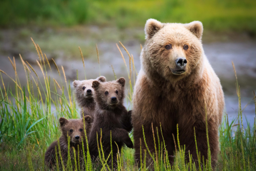

In [5]:
urls = search_images_ddg('bear photos', max_images=10)
#len(urls), urls[0]

dest = 'bear.jpg'
fastdownload.download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

In [6]:
path = Path('bears')

In [7]:
bear_types = 'grizzly','black','teddy'

if not path.exists():
    path.mkdir()

for o in bear_types:
    dest = (path/o)
    if not dest.exists():
        dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} bear')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

In [8]:
fns = get_image_files(path)
fns

(#579) [Path('bears/grizzly/2bf5159e-7c8f-4cd9-b169-afac58a2c7d6.jpg'),Path('bears/grizzly/326d7fb8-cc5b-4b84-a747-e00ca736be05.jpg'),Path('bears/grizzly/2fff934a-c6e7-4331-9244-b41603d74e0b.jpg'),Path('bears/grizzly/16f45ea9-05aa-4ccd-acfd-7f7800b217f0.png'),Path('bears/grizzly/9dc74233-84a1-4992-a879-0c51d0e59da4.jpg'),Path('bears/grizzly/0dc3a291-a0ee-45a2-b8f6-eb149e8809f8.jpg'),Path('bears/grizzly/7967f66e-64fe-4491-9f66-755c9f0c8a42.jpg'),Path('bears/grizzly/fde88964-d30c-4469-8985-6967abc33b03.jpg'),Path('bears/grizzly/690f77a3-8cbb-4cc7-b77e-7f0e863784b5.jpg'),Path('bears/grizzly/e5759f24-0ac9-40ac-b033-5aca2b132eac.JPG')...]

In [9]:
failed = verify_images(fns)
failed

(#7) [Path('bears/grizzly/7e1a2261-4067-4285-8023-4840212c493c.jpg'),Path('bears/grizzly/322d052b-9b15-4f56-a1ba-2b9b15723668.jpg'),Path('bears/grizzly/5c7c8427-b62e-4829-8342-e8491beeace6.jpg'),Path('bears/black/8bbc3975-421f-441e-9cc0-65d7c4fa809e.jpg'),Path('bears/black/3fe548ff-1d36-4cba-9898-7c5ba5b07824.jpg'),Path('bears/teddy/e12ab865-ac79-44b3-921c-dfe61bc12f3b.jpg'),Path('bears/teddy/736db2ef-31d9-4fe9-8824-5f2c0510c555.jpg')]

In [10]:
failed.map(Path.unlink)

(#7) [None,None,None,None,None,None,None]

In [11]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
dls = bears.dataloaders(path)

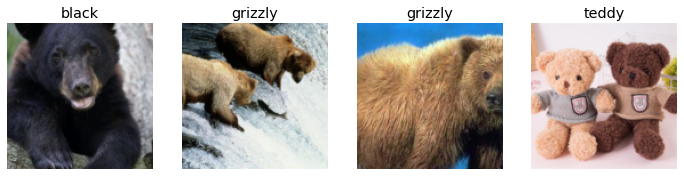

In [13]:
dls.valid.show_batch(max_n=4, nrows=1)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f370

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.165525,0.261915,0.078947,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.269584,0.205476,0.043860,00:39
1,0.237401,0.222824,0.061404,00:40
2,0.185201,0.264974,0.061404,00:38
3,0.143485,0.262785,0.070175,00:40


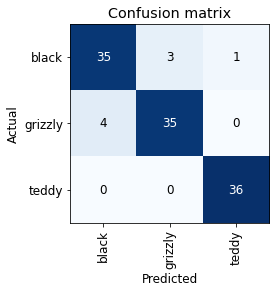

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

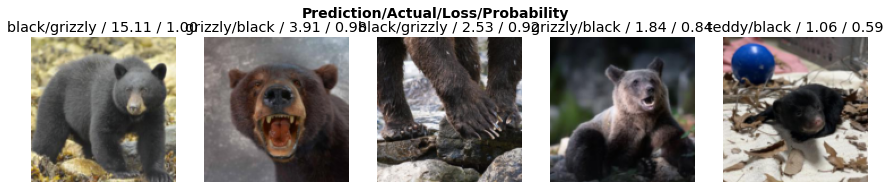

In [16]:
interp.plot_top_losses(5, nrows=1)